In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(G:\archive (1))

SyntaxError: invalid syntax (Temp/ipykernel_10740/3307869807.py, line 1)

In [6]:
df=pd.read_csv(G:\archive (1)\Churn_Modelling.csv)
df.head()

SyntaxError: invalid syntax (Temp/ipykernel_10740/2535973203.py, line 1)

In [7]:
df=pd.read_csv("G:\Churn_Modelling.csv")

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [11]:
telco_base_data = df

In [12]:
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
telco_new= telco_base_data[["Geography","Gender","Exited"]]

# Univariate analysis

In [ ]:
telco_new.head()

In [ ]:
telco_new.Exited.value_counts()

In [ ]:
telco_new.Exited.value_counts()/len(telco_new)*100

In [ ]:
for i, predictor in enumerate(telco_new.drop(columns=["Exited"])):
    plt.figure()
    import seaborn as sns
    sns.countplot(data=telco_new, x=predictor, hue="Exited")

# Bivariate analysis

In [ ]:
sns.histplot(x="Gender",hue="Geography",data=telco_new, stat="count", multiple="dodge")

In [ ]:
telco_new_target1=telco_new.loc[telco_new["Exited"]==1]

In [ ]:
sns.histplot(x="Gender", hue="Geography", data=telco_new_target1, stat="count", multiple="dodge")

# Numberical analysis
Correlation : It ranges from -1 to 1 
+1 --> Positive correlation
-1 --> Negetive correlation
~0 --> No correlation

In [ ]:
telco_base_data.corr()

In [ ]:
plt.figure(figsize=(20,8))
telco_base_data.corr()["Exited"].sort_values(ascending=False).plot(kind="bar")


In [ ]:
telco_base_data.corr()

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(telco_base_data.corr(), cmap="Paired")


In [ ]:
telco_base_data.head(5)

In [ ]:
telco_base_data["Age"].value_counts().sort_index(ascending=True).plot()

In [ ]:
telco_base_data_1=telco_base_data.loc[telco_base_data["Exited"]==1]

In [ ]:
telco_base_data_1["Age"].value_counts().sort_index(ascending=True).plot()

In [ ]:
Tot =sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==0)],
                color="Red", shade=True)
Tot =sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==1)],
                color="Blue", shade=True)
Tot.legend(["no churn","Churn"], loc="upper right")
Tot.set_ylabel("Density")
Tot.set_xlabel("Age")
Tot.set_title("Age by churn")

In [ ]:
Tot =sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==0)],
                color="Red", shade=True)
Tot =sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==1)],
                color="Blue", shade=True)
Tot.legend(["no churn","Churn"], loc="upper right")
Tot.set_ylabel("Density")
Tot.set_xlabel("Age")
Tot.set_title("Age by churn")

In [ ]:
Tot =sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==0)],
                color="Red", shade=True)
Tot =sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==1)],
                color="Blue", shade=True)
Tot.legend(["no churn","Churn"], loc="upper right")
Tot.set_ylabel("Density")
Tot.set_xlabel("Age")
Tot.set_title("Age by churn")

In [13]:
df=pd.read_csv("G:\Churn_Modelling.csv")


In [14]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df.drop(columns=["CustomerId","RowNumber","Surname"],axis=1, inplace=True)

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Bining Technique

In [22]:
df.Age.min()

18

In [23]:
df.Age.max()

92

In [28]:
labels=["0-20","21-40","41-60", "Above 61" ]
bins = [0,20,40,60,100]

df["Age_bins"]=pd.cut(df.Age, bins, labels = labels, include_lowest=True)

In [29]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [30]:
df[["Age","Age_bins"]]

,Age,Age_bins
0,42,41-60
1,41,41-60
2,42,41-60
3,39,21-40
4,43,41-60
...,...,...
9995,39,21-40
9996,35,21-40
9997,36,21-40
9998,42,41-60


In [31]:
df[["Age","Age_bins"]].to_csv("age.csv")

In [32]:
df.Age_bins.value_counts()

21-40       6330
41-60       3117
Above 61     464
0-20          89
Name: Age_bins, dtype: int64

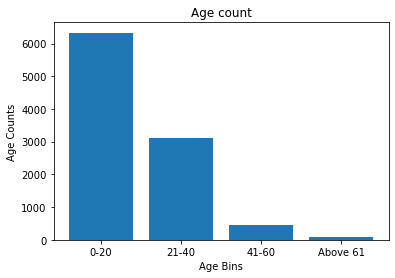

In [33]:
# making the bar chart on the data
plt.bar(labels, df.Age_bins.value_counts())

# giving the title
plt.title("Age count")

#giving X & Y labels
plt.xlabel("Age Bins")
plt.ylabel("Age Counts")

#visualizing the plot
plt.show()

# Feature Encoding

In [34]:
df= pd.read_csv("G:\Churn_Modelling.csv")

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [2]:
df=pd.read_csv("G:\Churn_Modelling1.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9772 non-null   object 
 6   Age              9836 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.Gender.value_counts()

Male      5341
Female    4431
Name: Gender, dtype: int64

In [6]:
null_values=df.isnull().sum()
print(null_values)

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender             228
Age                164
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [7]:
df.Gender.mode()

0    Male
dtype: object

In [8]:
df.Gender.value_counts()

Male      5341
Female    4431
Name: Gender, dtype: int64

In [9]:
df["Gender"] =df["Gender"]. fillna("Male")

In [10]:
df.Gender.value_counts()

Male      5569
Female    4431
Name: Gender, dtype: int64

In [2]:
https://github.com/diwakardangal/exploratory-data-analysis.git
    

SyntaxError: invalid syntax (Temp/ipykernel_47268/4009738512.py, line 1)